In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [3]:
filepath = "Fatal_Collisions.csv"
fatal_coll=pd.read_csv(filepath)
fatal_coll.head()

,X,Y,Index_,ACCNUM,YEAR,DATE,TIME,Hour,STREET1,STREET2,...,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,Hood_ID,Neighbourh,ObjectId
0,-79.227590,43.816245,7377669,1275814,2012,2012-01-12T05:00:00.000Z,558,5,NEILSON RD,FINCH AVE E,...,,Yes,,Yes,,,,132,Malvern (132),1
1,-79.447742,43.637614,80000014,131058335,2013,2013-11-29T05:00:00.000Z,558,5,1491 LAKE SHORE BLVD W,,...,,,Yes,Yes,,,,85,South Parkdale (85),2
2,-79.259883,43.716773,80944448,8001077165,2018,2018-06-14T04:00:00.000Z,558,5,ST CLAIR AVE E,DANFORTH RD,...,,,,Yes,,,,120,Clairlea-Birchmount (120),3
3,-79.316890,43.821345,6253540,1162012,2010,2010-04-13T04:00:00.000Z,559,5,STEELES AVE E,BIRCHMOUNT RD,...,,Yes,,Yes,Yes,,Yes,116,Steeles (116),4
4,-79.574641,43.728129,80501551,4003267619,2014,2014-11-09T05:00:00.000Z,559,5,KIPLING AVE,WESTHUMBER BLVD,...,,Yes,,Yes,Yes,,,4,Rexdale-Kipling (4),5


In [4]:
fatal_col1=fatal_coll[['LATITUDE','LONGITUDE','STREET1','STREET2','DATE','TIME','YEAR','ROAD_CLASS','District','LOCCOORD','TRAFFCTL','VISIBILITY','LIGHT',
                       'INVTYPE','INVAGE','VEHTYPE','MANOEUVER','DRIVACT','DRIVCOND','PEDESTRIAN','CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','SPEEDING','REDLIGHT','ALCOHOL','Neighbourh','ObjectId']]

In [5]:
fatal_col1.columns

Index(['LATITUDE', 'LONGITUDE', 'STREET1', 'STREET2', 'DATE', 'TIME', 'YEAR',
       'ROAD_CLASS', 'District', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT',
       'INVTYPE', 'INVAGE', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'Neighbourh', 'ObjectId'],
      dtype='object')

In [6]:
fatal_col2=fatal_col1.rename(columns={"LOCCOORD":"INTERSECTION","ROAD_CLASS":"ACCIDENT LANE","INVTYPE":"VICTIM","INVAGE":"VICTIM AGE"})
fatal_col2.columns

Index(['LATITUDE', 'LONGITUDE', 'STREET1', 'STREET2', 'DATE', 'TIME', 'YEAR',
       'ACCIDENT LANE', 'District', 'INTERSECTION', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'VICTIM', 'VICTIM AGE', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE',
       'TRUCK', 'SPEEDING', 'REDLIGHT', 'ALCOHOL', 'Neighbourh', 'ObjectId'],
      dtype='object')

In [7]:
fatal_col3=fatal_col2[['LATITUDE','LONGITUDE','DATE','TIME','YEAR','ACCIDENT LANE','District','INTERSECTION','VISIBILITY','LIGHT',
                       'VICTIM','VICTIM AGE','VEHTYPE','DRIVACT','PEDESTRIAN','CYCLIST','AUTOMOBILE','MOTORCYCLE','TRUCK','SPEEDING','REDLIGHT','ALCOHOL','Neighbourh','ObjectId']]

In [8]:
fatal_col4=fatal_col3
fatal_col4.columns

Index(['LATITUDE', 'LONGITUDE', 'DATE', 'TIME', 'YEAR', 'ACCIDENT LANE',
       'District', 'INTERSECTION', 'VISIBILITY', 'LIGHT', 'VICTIM',
       'VICTIM AGE', 'VEHTYPE', 'DRIVACT', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'SPEEDING', 'REDLIGHT', 'ALCOHOL',
       'Neighbourh', 'ObjectId'],
      dtype='object')

In [9]:
def cause_finder(r):
    
    if ((r['ALCOHOL'] == 'Yes') and (r['SPEEDING'] == 'Yes')):
        v = "Alcohol & Speeding"
    elif (r['SPEEDING'] == 'Yes'):
        v = "Speeding"
    elif (r['ALCOHOL'] == 'Yes'):
        v = "Alcohol"
    elif ((r['DRIVACT']=='Disobeyed Traffic Control') or (r['DRIVACT']=='Exceeding Speed Limit') or 
          (r['DRIVACT']=='Failed to Yield Right of Way') or (r['DRIVACT']=='Following too Close') or 
         (r['DRIVACT']=='Improper Lane Change') or (r['DRIVACT']=='Improper Passing') or
         (r['DRIVACT']=='Improper Turn') or (r['DRIVACT']=='Lost control') or (r['DRIVACT']=='Speed too Fast For Condition') or
         (r['DRIVACT']=='Wrong Way on One Way Road') or (r['DRIVACT']=='Speed too Slow')):
        v= r['DRIVACT']
    elif ((r['VISIBILITY']=='Rain') or (r['VISIBILITY']=='Snow') or (r['VISIBILITY']=='Freezing Rain') or
          (r['VISIBILITY']=='Fog, Mist, Smoke, Dust')):
        v= r['VISIBILITY']
    else:
        v='Unknown'
 
    return v

fatal_col4['Cause'] = fatal_col4.apply(cause_finder, axis = 1)
#fatal_col4.loc[fatal_col4['Cause_Real']=='']
fatal_col4['Cause'].value_counts()

C:\Users\ARJUNJohri\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unknown                         350
Speeding                        126
Rain                             51
Lost control                     30
Alcohol & Speeding               20
Alcohol                          10
Disobeyed Traffic Control         8
Snow                              6
Failed to Yield Right of Way      3
Improper Turn                     2
Freezing Rain                     1
Improper Lane Change              1
Speed too Slow                    1
Following too Close               1
Name: Cause, dtype: int64

In [10]:
fatal_col4.head()

,LATITUDE,LONGITUDE,DATE,TIME,YEAR,ACCIDENT LANE,District,INTERSECTION,VISIBILITY,LIGHT,...,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,SPEEDING,REDLIGHT,ALCOHOL,Neighbourh,ObjectId,Cause
0,43.816245,-79.227590,2012-01-12T05:00:00.000Z,558,2012,Minor Arterial,Scarborough,Intersection,Rain,"Dark, artificial",...,,Yes,,,,,,Malvern (132),1,Rain
1,43.637614,-79.447742,2013-11-29T05:00:00.000Z,558,2013,Major Arterial,Toronto and East York,Mid-Block,Clear,"Dawn, artificial",...,,Yes,,,Yes,,,South Parkdale (85),2,Speeding
2,43.716773,-79.259883,2018-06-14T04:00:00.000Z,558,2018,Major Arterial,Scarborough,Intersection,Clear,Daylight,...,,Yes,Yes,,,,,Clairlea-Birchmount (120),3,Unknown
3,43.821345,-79.316890,2010-04-13T04:00:00.000Z,559,2010,Major Arterial,Scarborough,Intersection,Clear,Dawn,...,,Yes,,,,Yes,,Steeles (116),4,Unknown
4,43.728129,-79.574641,2014-11-09T05:00:00.000Z,559,2014,Major Arterial,Etobicoke York,Intersection,Clear,"Dark, artificial",...,,Yes,,,,Yes,,Rexdale-Kipling (4),5,Unknown


In [11]:
Accident_info=fatal_col4[['LATITUDE', 'LONGITUDE', 'DATE', 'TIME', 'YEAR', 'ACCIDENT LANE',
       'District', 'INTERSECTION','VICTIM',
       'VICTIM AGE', 'VEHTYPE', 'DRIVACT', 'PEDESTRIAN', 'CYCLIST',
       'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'Cause','Neighbourh']]
Accident_info.to_csv("Accident_info.csv")
fatal_col4.to_csv("Fatal Collisions.csv")
Accident_info.head()

,LATITUDE,LONGITUDE,DATE,TIME,YEAR,ACCIDENT LANE,District,INTERSECTION,VICTIM,VICTIM AGE,VEHTYPE,DRIVACT,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,Cause,Neighbourh
0,43.816245,-79.227590,2012-01-12T05:00:00.000Z,558,2012,Minor Arterial,Scarborough,Intersection,Pedestrian,40 to 44,Other,,Yes,,Yes,,,Rain,Malvern (132)
1,43.637614,-79.447742,2013-11-29T05:00:00.000Z,558,2013,Major Arterial,Toronto and East York,Mid-Block,Driver,25 to 29,"Automobile, Station Wagon",Lost control,,,Yes,,,Speeding,South Parkdale (85)
2,43.716773,-79.259883,2018-06-14T04:00:00.000Z,558,2018,Major Arterial,Scarborough,Intersection,Motorcycle Driver,55 to 59,Motorcycle,Driving Properly,,,Yes,Yes,,Unknown,Clairlea-Birchmount (120)
3,43.821345,-79.316890,2010-04-13T04:00:00.000Z,559,2010,Major Arterial,Scarborough,Intersection,Passenger,70 to 74,Other,,,,Yes,,,Unknown,Steeles (116)
4,43.728129,-79.574641,2014-11-09T05:00:00.000Z,559,2014,Major Arterial,Etobicoke York,Intersection,Passenger,20 to 24,,,,,Yes,,,Unknown,Rexdale-Kipling (4)


In [23]:
Cause_df=Accident_info.groupby('Cause').count()
Cause=Cause_df.drop(axis='index',index='Unknown')

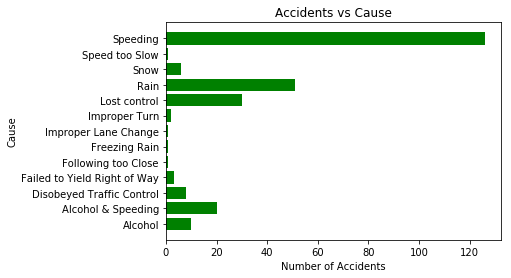

In [27]:
plt.barh(Cause.index,width=Cause['DRIVACT'],height=0.8,color="green")
plt.xlabel('Number of Accidents')
plt.ylabel('Cause')
plt.title('Accidents vs Cause')
plt.savefig('Accidents vs Cause')